In [25]:
import sys, os
import pathlib
import torch
import numpy as np
import tqdm
import networkx as nx
from matplotlib import pyplot as plt

In [26]:
import dgl
from dgl.data import register_data_args, load_data

In [18]:
!which python

/yushi/conda/envs/dgl/bin/python


In [20]:
reddit = dgl.data.RedditDataset()

Extracting file to /home/v-yulan/.dgl/reddit
Finished data loading.
  NumNodes: 232965
  NumEdges: 114615892
  NumFeats: 602
  NumClasses: 41
  NumTrainingSamples: 153431
  NumValidationSamples: 23831
  NumTestSamples: 55703


In [14]:
cora = dgl.data.CoraDataset()

In [51]:
def statistics_of_subgraph(g:nx.Graph):
    return {
        'is_connected':nx.is_connected(g),
        'number_connected_components': nx.number_connected_components(g)
    }
    pass

In [46]:
# dataset = reddit
dataset = Object()

NameError: name 'Object' is not defined

In [3]:
from scipy import sparse as sp
import os.path as osp
raw_dir = '/yushi/pytorch_geometric/data/Reddit/raw'
adj = sp.load_npz(osp.join(raw_dir, 'reddit_graph.npz'))
nx_reddit = nx.from_scipy_sparse_matrix(adj)

In [8]:
nx.write_gpickle(nx_reddit, 'reddit_networkx.gpickle')

In [67]:
id=15
label_nodes = np.where(labels_class==id)[0]
print(len(label_nodes), label_nodes[:10])
# sg = dataset.graph.subgraph(label_nodes)
sg = nx.subgraph(graph_nx, labels)
sg.is_directed()

49019 [93691 93809 93817 93818 93820 93824 93825 93827 93829 93831]


False

In [70]:
sg.degree

DegreeView({47617: 19, 358402: 3, 1794054: 15, 381446: 26, 419334: 2, 101387: 29, 1862668: 1, 1745933: 23, 25626: 51, 244251: 7, 1731100: 1, 194588: 8, 413211: 48, 259612: 12, 413210: 13, 144929: 26, 1804836: 1, 259621: 111, 140326: 2, 3110: 9, 61991: 9, 1880614: 28, 1729069: 33, 302127: 2, 258609: 17, 284210: 12, 1868855: 11, 98877: 33, 128575: 8, 191553: 37, 1820240: 3, 44114: 1, 132691: 26, 27734: 20, 1814103: 16, 1796698: 83, 483931: 7, 1849948: 41, 371293: 12, 181342: 45, 241248: 11, 1811556: 2, 128101: 1, 408165: 9, 81000: 2, 307821: 39, 44145: 4, 171127: 15, 114808: 3, 245369: 3, 1725050: 2, 145531: 16, 517759: 15, 1744516: 35, 252552: 3, 139913: 3, 137: 23, 328842: 4, 55953: 45, 145042: 68, 67219: 8, 322196: 23, 80538: 42, 197275: 11, 408222: 2, 1774239: 3, 358052: 2, 323239: 6, 146087: 10, 387242: 36, 296108: 13, 301229: 14, 1871537: 36, 198328: 12, 1889982: 1, 198334: 3, 8384: 31, 202943: 8, 1835716: 12, 347332: 7, 314054: 23, 1726663: 2, 338124: 22, 1858771: 2, 94421: 17, 31

In [68]:
statistics_of_subgraph(sg)

{'is_connected': True, 'number_connected_components': 1}

In [ ]:
if type(sg) not in (nx.Graph, nx.DiGraph):
    nx_label_sg = sg.to_networkx().to_undirected()
    print('nx_label_sg done')
    nx_graph = dataset.graph.to_networkx().to_undirected()
    print('nx_graph done')
elif sg.is_directed():
    nx_label_sg = sg.to_undirected()
#     nx_graph = dataset.graph.to_undirected()
    nx_graph = graph_nx.to_undirected()

In [20]:
subgraph_cc = sorted(nx.connected_components(nx_label_sg), key=len, reverse=True)
# nx.connected_components(nx_label_sg)
print(
[len(cc) for cc in subgraph_cc][:10],
    subgraph_cc[0].__len__() / len(label_nodes)
)
subgraph_cc[1:5]

[287, 8, 6, 4, 4, 3, 3, 2, 2, 2] 0.8176638176638177


[{1853, 1861, 2005, 2141, 2320, 2345, 2418, 2511},
 {424, 571, 1762, 2331, 2495, 2694},
 {903, 1390, 1491, 1605},
 {1050, 1306, 1310, 1492}]

In [23]:
!pip install randomcolor

In [71]:
info = statistics(graph_nx, [52465, 1847091], level=2)
# colors = get_colors(len(dataset.labels), mode='raw')



  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [06:39<06:39, 399.78s/it]

100%|██████████| 2/2 [06:39<00:00, 199.98s/it]

 Node     1-hop   2-hop
52465     84      6804 
1847091   18      296  


In [23]:
labels_num = 47
colors = get_colors(labels_num, mode='raw')
nx_graph = graph_nx

In [33]:
labels_class = np.where(labels)[1]

In [74]:
case = 1847091
hop = 3
sub_node = sum([node_list for node_list in info[case][0][:hop]], [])
sub_graph = nx_graph.subgraph(sub_node)
pos = nx.spring_layout(sub_graph, k=0.15)
class_node_pos = get_node_pos(labels_class, sub_node, mode='raw')
labels = dict(zip(sub_node, labels_class[sub_node]))
labels.update({case: f'C'})

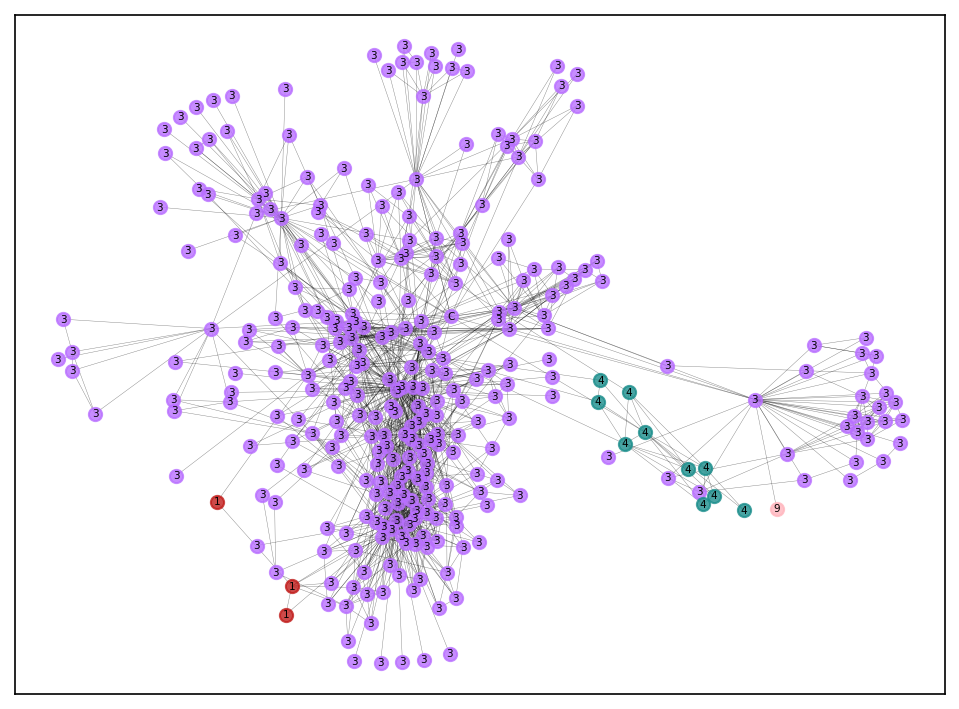

In [75]:
plot_cluster(sub_graph, class_node_pos, colors, pos, labels=labels)

In [40]:
# sub_graph.number_of_edges()

2184

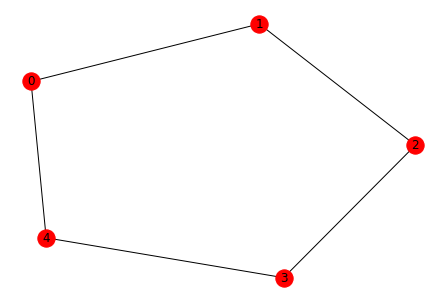

In [4]:
import dgl
import networkx as nx
G = dgl.DGLGraph()
G.add_nodes(5)
G.add_edges([0, 1, 2, 3, 4], [1, 2, 3, 4, 0])
# SG = G.subgraph([0,1,3])
# nx_SG = SG.to_networkx().to_undirected()
nx.draw(G.to_networkx().to_undirected(), with_labels=True)


In [35]:
nx.is_connected(G.to_networkx().to_undirected())

True

In [ ]:
nx_reddit = reddit.graph.to_networkx().to_undirected()

In [45]:
list(nx_reddit.neighbors(1)).__len__()

154

In [52]:
nx_reddit = nx_reddit.to_undirected()

In [58]:
degree = nx_reddit.degree

In [67]:
np.mean(list(dict(degree).values()))

In [1]:
reddit.train_mask.nonzero()

NameError: name 'reddit' is not defined

In [86]:
(reddit.labels[1] == reddit.labels[list(nx_reddit.neighbors(1))]).mean()

0.974025974025974

In [111]:
def neighbor_same_label_dglgraph(graph: dgl.DGLGraph, train_mask: np.array, labels: np.array):
    train_nodes = np.nonzero(train_mask)[0]
    same_label_neib_percentage = {}
    for node in tqdm(train_nodes):
        neibs = list(graph.successors(node))
        same_label_neib_percentage[node] = ((labels[node]==labels[neibs]).mean(), len(neibs))
    return same_label_neib_percentage



In [25]:
from tqdm import tqdm
percent = neighbor_same_label_dglgraph(graph, reddit.train_mask, reddit.labels)

100%|██████████| 153431/153431 [05:06<00:00, 500.15it/s]


In [26]:
from operator import itemgetter
value = np.array(list((percent.values())))

In [31]:
value[:,0].min()

0.0

In [100]:
labels = reddit.labels
node = 1
neibs = nx_reddit.neighbors(node)

(labels[node]==labels[neibs]).mean()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [5]:
# !pip install tensorflow==1.15
import tensorflow as tf
import numpy as np
import time
import json
from tensorflow import gfile
from networkx.readwrite import json_graph

dataset_path, dataset_str = '/yushi/dataset/', 'Amazon2M'

"""Load GraphSAGE data."""
start_time = time.time()

graph_json = json.load(
  gfile.Open('{}/{}/{}-G.json'.format(dataset_path, dataset_str,
                                      dataset_str)))
graph_nx = json_graph.node_link_graph(graph_json)

id_map = json.load(
  gfile.Open('{}/{}/{}-id_map.json'.format(dataset_path, dataset_str,
                                           dataset_str)))
is_digit = list(id_map.keys())[0].isdigit()
id_map = {(int(k) if is_digit else k): int(v) for k, v in id_map.items()}
class_map = json.load(
  gfile.Open('{}/{}/{}-class_map.json'.format(dataset_path, dataset_str,
                                              dataset_str)))

is_instance = isinstance(list(class_map.values())[0], list)
class_map = {(int(k) if is_digit else k): (v if is_instance else int(v))
           for k, v in class_map.items()}

broken_count = 0
to_remove = []
for node in graph_nx.nodes():
    if node not in id_map:
        to_remove.append(node)
        broken_count += 1
for node in to_remove:
    graph_nx.remove_node(node)
tf.logging.info(
  'Removed %d nodes that lacked proper annotations due to networkx versioning issues',
  broken_count)

INFO:tensorflow:Removed 0 nodes that lacked proper annotations due to networkx versioning issues


In [6]:
feats = np.load(
  gfile.Open(
      '{}/{}/{}-feats.npy'.format(dataset_path, dataset_str, dataset_str),
      'rb')).astype(np.float32)

In [7]:
edges = []
for edge in graph_nx.edges():
    if edge[0] in id_map and edge[1] in id_map:
        edges.append((id_map[edge[0]], id_map[edge[1]]))
num_data = len(id_map)

val_data = np.array(
  [id_map[n] for n in graph_nx.nodes() if graph_nx.nodes[n]['val']],
  dtype=np.int32)
test_data = np.array(
  [id_map[n] for n in graph_nx.nodes() if graph_nx.nodes[n]['test']],
  dtype=np.int32)

In [8]:
# Process labels
if isinstance(list(class_map.values())[0], list):
    num_classes = len(list(class_map.values())[0])
    labels = np.zeros((num_data, num_classes), dtype=np.float32)
    for k in class_map.keys():
        labels[id_map[k], :] = np.array(class_map[k])
else:
    num_classes = len(set(class_map.values()))
    labels = np.zeros((num_data, num_classes), dtype=np.float32)
for k in class_map.keys():
    labels[id_map[k], class_map[k]] = 1

In [13]:
nx.write_gpickle(graph_nx, 'Amazon2M_nx.gpickle')

In [23]:
np.save('train_data', train_data)
np.save('test_data', test_data)
np.save('val_data', val_data)
np.save('labels', labels)

In [ ]:
dgl_amazon_graph = dgl.DGLGraph(nx_graph)
dgl_amazon_graph

In [58]:
# edges = []
# for edge in graph_nx.edges():
#     if edge[0] in id_map and edge[1] in id_map:
#         edges.append((id_map[edge[0]], id_map[edge[1]]))
# num_data = len(id_map)

In [19]:
is_train = np.ones((num_data), dtype=np.bool)
is_train[val_data] = False
is_train[test_data] = False
train_data = np.array([n for n in range(num_data) if is_train[n]],dtype=np.int32)

In [20]:
train_data[-10:]

array([1709987, 1709988, 1709989, 1709990, 1709991, 1709992, 1709993,
       1709994, 1709995, 1709996], dtype=int32)

In [2]:
np.max(tuple(graph_nx.degree).values())

AttributeError: 'tuple' object has no attribute 'values'

In [69]:
amazon_graph_degree = dict(graph_nx.degree)

In [102]:
train_mask = np.zeros((num_data))

In [7]:
graph_nx.number_of_edges()

61859140

In [73]:
def graph_degree(graph: nx.Graph):
    '''
    @param graph: networkx graph
    '''
    if type(graph) is nx.DiGraph:
        graph = graph.to_undirected()    
    degree = dict(graph.degree)
    return {
        'max_deg': max(degree.values()),
        'avg_deg': np.mean(tuple(degree.values())),
        'min_deg': min(degree.values())
    }

In [74]:
graph_degree(graph_nx)

{'max_deg': 17481, 'avg_deg': 50.517278480573324, 'min_deg': 0}

In [ ]:
neighbor_same_label_nxgraph()

In [104]:
logit_label = np.where(labels)

In [105]:
logit_label[0]

array([      0,       1,       2, ..., 2449026, 2449027, 2449028])

In [106]:
train_mask[logit_label[0]] = 1

In [110]:
train_mask.sum()

In [118]:
def neighbor_same_label_nxgraph(graph: nx.Graph, train_mask: np.array, labels: np.array):
    """!
    :param graph: networkx graph
    """
    train_nodes = np.nonzero(train_mask)[0]
    same_label_neib_percentage = {}
    for node in tqdm(train_nodes):
        neibs = list(graph.neighbors(node))
#         print(neibs)
        same_label_neib_percentage[node] = ((labels[node]==labels[neibs]).mean(), len(neibs))
    return same_label_neib_percentage

In [1]:
# percent = neighbor_same_label_nxgraph(graph_nx, train_mask, logit_label[1])

In [116]:
logit_label

(array([      0,       1,       2, ..., 2449026, 2449027, 2449028]),
 array([ 0,  1,  2, ...,  3, 18,  3]))

In [120]:
value = np.array(list((percent.values())))

In [132]:
np.nanmax( value[:,0])

1.0

In [10]:
import networkx as nx
def bfs_queue(graph: nx.Graph, root, max_level=3, level=0):
    import collections
    queue, res = collections.deque([(root, 0)]), []
    nodes = set(res)
    while queue:
        node, level = queue.popleft()
        if level > max_level:
            break
        if node not in nodes:
            nodes.update([node])
            if len(res) < level+1:
                res.insert(level, [])
            res[level].append(node)
        for neighbor in list(graph[node]):
            try:
                if neighbor not in sum(res,[]):
                    queue.append([neighbor, level+1])
            except:
                import pdb; pdb.set_trace()
    return res, list(nodes)

def statistics(graph, nodes, level=6):
    from texttable import Texttable
    from tqdm import tqdm
    table = Texttable()
    table.set_deco(Texttable.HEADER)
    results = {}
#     table.set_cols_dtype(['t',  # text
#                               'f',  # float (decimal)
#                               'e',  # float (exponent)
#                               'i',  # integer
#                               'a']) # automatic
    stat = [['Node']]
    stat[0].extend([f'{i}-hop' for i in range(1,level+1)])
    for node in tqdm(nodes):
        res, nodes = bfs_queue(graph, node, level)
        row = [node]
        for hop in range(1, level+1):
            if len(res) < hop+1:
                row.append(0)
            else:
                row.append(len(res[hop]))
        stat.append(row)
        results[node] = (res, nodes)
    table.add_rows(stat)
    print(table.draw())
    return results  
def get_colors(label_number: int, mode: str):
    import randomcolor
    rand_color = randomcolor.RandomColor()
    if mode == 'diff':
        colors = {'train': 'grey', 'pred_train': 'green', 'pred_false': 'r'}
    elif mode == 'raw':
        colors = dict([(i, j) for i, j in enumerate(
            rand_color.generate(count=label_number))])
    elif mode == 'train_test':
        colors = {'train': 'grey', 'test': 'black'}
    elif mode == 'error':
        colors = dict([(i, j) for i, j in enumerate(
            rand_color.generate(count=label_number))])
        colors.update({'root': 'black'})
    else:
        raise NotImplementedError
    return colors

from typing import Dict, Tuple, List, Sequence, Optional
def get_node_pos(labels: Optional[np.ndarray] = None, sg_nodes: List = None, idx_test: Optional[List] = None, mode='raw', predict: Optional[np.ndarray] = None) -> Dict:
    '''
    1. get the whole graph: raw
    2. train and test node
    3. right and wrong node
    '''
    if type(labels) is torch.Tensor:
        labels = labels.cpu().numpy()
    if type(predict) is torch.Tensor:
        predict = predict.cpu().numpy()

    node_pos = {}
    # np.argwhere(labels == label).flatten().tolist()})
    if mode == 'raw':
        if sg_nodes is not None:
            for label in set(labels[sg_nodes]):
                node_pos.update(
                    {label: [node for node in sg_nodes if labels[node] == label]})
        else:
            for label in set(labels):
                node_pos.update(
                    {label: np.argwhere(labels == label).flatten().tolist()})
    elif mode == 'error':
        root = sg_nodes[0]
        for label in set(labels[sg_nodes]):
            node_pos.update(
                {label: [node for node in sg_nodes if labels[node] == label]})
        print(node_pos)
        node_pos.update({'root': [root]})
                            
    elif mode == 'train_test':
        assert idx_test is not None and sg_nodes is not None
        test_sg_nodes = list(set(sg_nodes).intersection(idx_test))
        train_sg_nodes = list(set(sg_nodes).difference(test_sg_nodes))
        node_pos.update({'train': train_sg_nodes, 'test': test_sg_nodes})
        pass

    elif mode == 'diff':
        assert predict is not None and sg_nodes is not None and idx_test is not None
        test_sg_nodes = list(set(sg_nodes).intersection(idx_test))
        train_sg_nodes = list(set(sg_nodes).difference(test_sg_nodes))
        true = list(set(idx_test[np.argwhere(
            labels[idx_test] == predict).flatten().tolist()]).intersection(test_sg_nodes))
        false = list(set(test_sg_nodes).difference(true))
        node_pos.update(
            {'train': train_sg_nodes, 'pred_true': true, 'pred_false': false})

    else:
        raise NotImplementedError(f'mode: {mode} unrecognized')

    return node_pos

def plot_cluster(graph, node_pos, colors, pos, options={"node_size": 40, "alpha": 0.8},  figsize=(8, 6), spring_k=0.15, labels=None, border_edge_list=None):
    from matplotlib.pyplot import figure
    figure(num=None, figsize=figsize, dpi=150, facecolor='w', edgecolor='k')
    for node_label in node_pos:
        nx.draw_networkx_nodes(
            graph, pos, nodelist=node_pos[node_label], node_color=colors[node_label], **options)
    nx.draw_networkx_edges(graph, pos, width=0.2, alpha=0.5)
    if labels is not None:
        nx.draw_networkx_labels(graph, pos, labels, font_size=5)
    if border_edge_list:
        nx.draw_networkx_edges(graph,pos,edgelist=border_edge_list,width=1,alpha=0.5,edge_color="b")
def get_1hop_neighbors_edges(adj, node):
    res = np.argwhere(adj[node]).flatten().tolist()
    res.remove(node)
    edge_list = [(node, i) for i in res]
    return res, edge_list
def one_hop_n_class(node, labels, adj):
    one_hop_n = np.argwhere(ori_adj[node]).flatten().tolist()
    neighbor_class = {i:labels[i] for i in one_hop_n}
    node_label = labels[node]
    from collections import Counter
    count = Counter(labels[one_hop_n])
    length = list(count.elements()).__len__()
    for ele in count:
        count[ele] = f'{count[ele]/length*100:.1f}%'
    return str(count), neighbor_class